In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Load the datase
df = pd.read_csv('./algea.csv')

df.head()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
0,1011.00,1.11,0.17,0.08,23.39,7.27,9.22,4736.51
1,1206.50,3.29,0.14,0.04,14.74,7.94,9.59,4677.34
2,1450.63,1.67,0.04,0.02,28.58,7.35,4.46,3388.85
3,1158.40,2.48,0.09,0.06,27.18,7.43,6.34,4899.17
4,1159.92,2.15,0.15,0.08,22.52,7.92,6.46,4974.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Light        9784 non-null   float64
 1   Nitrate      9784 non-null   float64
 2   Iron         9784 non-null   float64
 3   Phosphate    9784 non-null   float64
 4   Temperature  9784 non-null   float64
 5   pH           9784 non-null   float64
 6   CO2          9784 non-null   float64
 7   Population   9784 non-null   float64
dtypes: float64(8)
memory usage: 611.6 KB


In [4]:
# Missing data
print(df.isnull().sum())

Light          0
Nitrate        0
Iron           0
Phosphate      0
Temperature    0
pH             0
CO2            0
Population     0
dtype: int64


In [5]:
# Check percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

Light          0.0
Nitrate        0.0
Iron           0.0
Phosphate      0.0
Temperature    0.0
pH             0.0
CO2            0.0
Population     0.0
dtype: float64

In [6]:
# Summary statistics
df.describe()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
count,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000
mean,1026.172916,4.493676,0.102977,0.105244,19.974967,7.502310,6.008941,3161.595503
std,565.252246,2.003815,0.056221,0.054843,5.756035,0.286528,2.299361,1460.094323
min,40.250000,1.000000,0.010000,0.010000,10.000000,7.000000,2.010000,0.000000
25%,539.925000,2.760000,0.050000,0.060000,14.960000,7.260000,4.040000,2055.460000
50%,1023.780000,4.530000,0.100000,0.110000,20.010000,7.500000,6.020000,3565.390000
75%,1516.085000,6.210000,0.150000,0.150000,25.000000,7.750000,7.980000,4374.555000
max,2009.860000,8.000000,0.200000,0.200000,29.990000,8.000000,10.000000,5250.440000


In [7]:
# Missing data

df.isna().sum() 

Light          0
Nitrate        0
Iron           0
Phosphate      0
Temperature    0
pH             0
CO2            0
Population     0
dtype: int64

In [8]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['Light', 'Nitrate', 'Iron', 'Phosphate', 'Temperature', 'pH', 'CO2']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Population"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

    Population        VIF
0        Light   4.280880
1      Nitrate   5.985579
2         Iron   4.342706
3    Phosphate   4.650561
4  Temperature  12.884660
5           pH  33.683920
6          CO2   7.746984


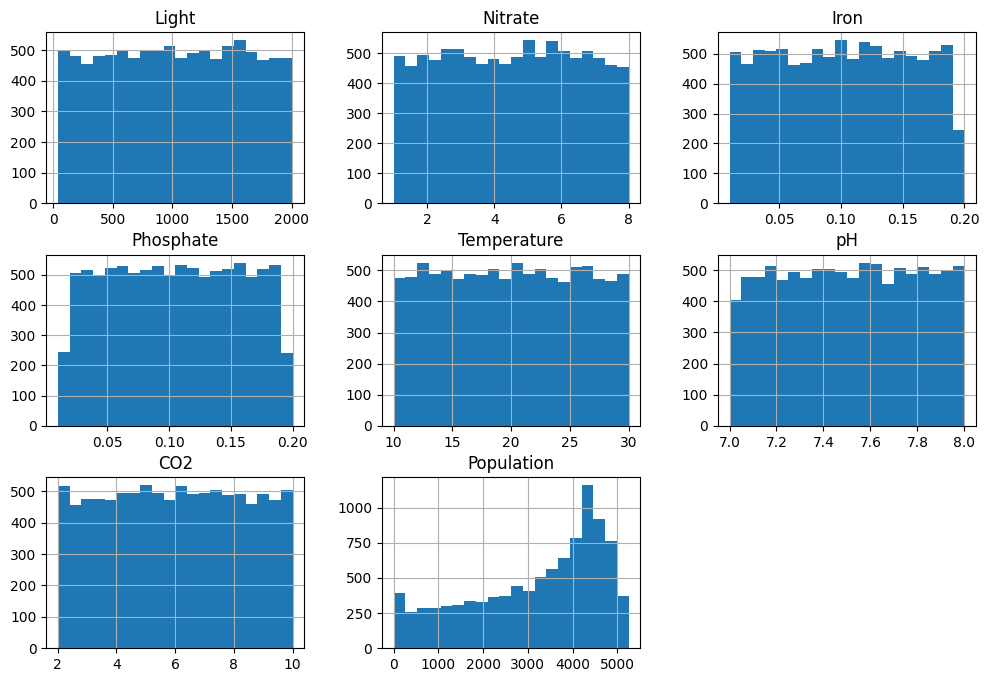

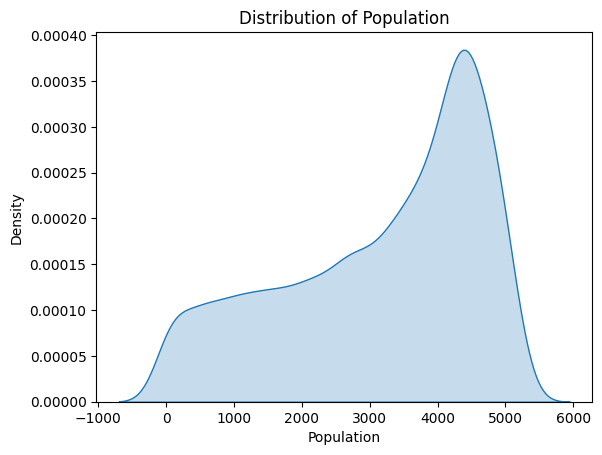

In [9]:
# Histograms

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for each variable
df.hist(figsize=(12, 8), bins=20)
plt.show()

# KDE plot for distribution of Population
sns.kdeplot(df['Population'], fill=True)
plt.title("Distribution of Population")
plt.show()


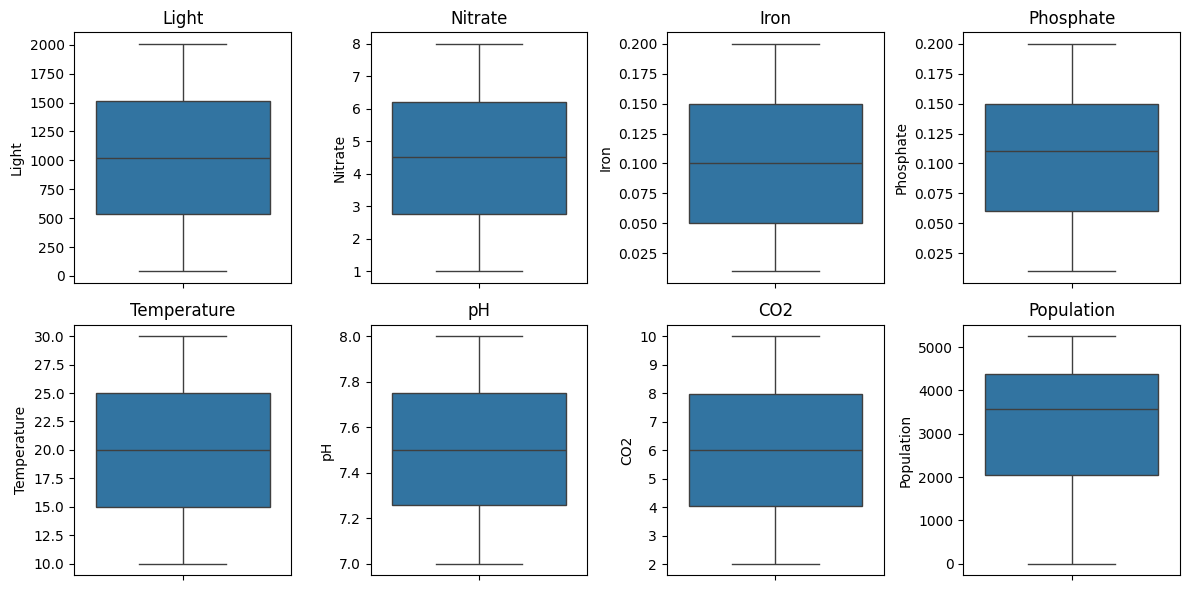

In [10]:
# Outlier Detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


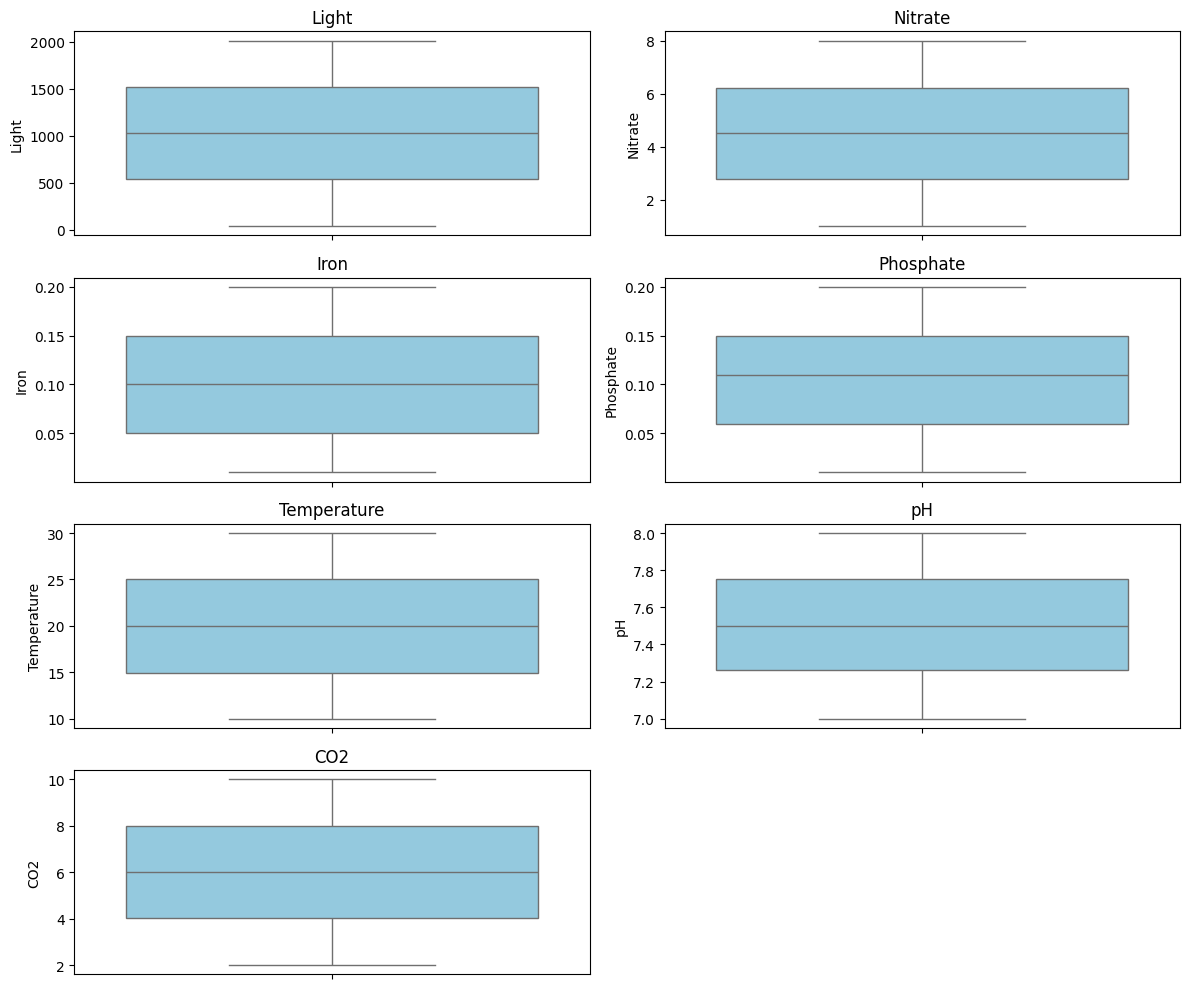

In [11]:
# Outliers

import matplotlib.pyplot as plt
import seaborn as sns

# List of independent variables
features = ['Light', 'Nitrate', 'Iron', 'Phosphate', 'Temperature', 'pH', 'CO2']

# Set figure size
plt.figure(figsize=(12, 10))

# Create subplots
for i, col in enumerate(features):
    plt.subplot(4, 2, i+1) 
    sns.boxplot(y=df[col], color='skyblue')  
    plt.title(f"{col}")

plt.tight_layout() 
plt.show()


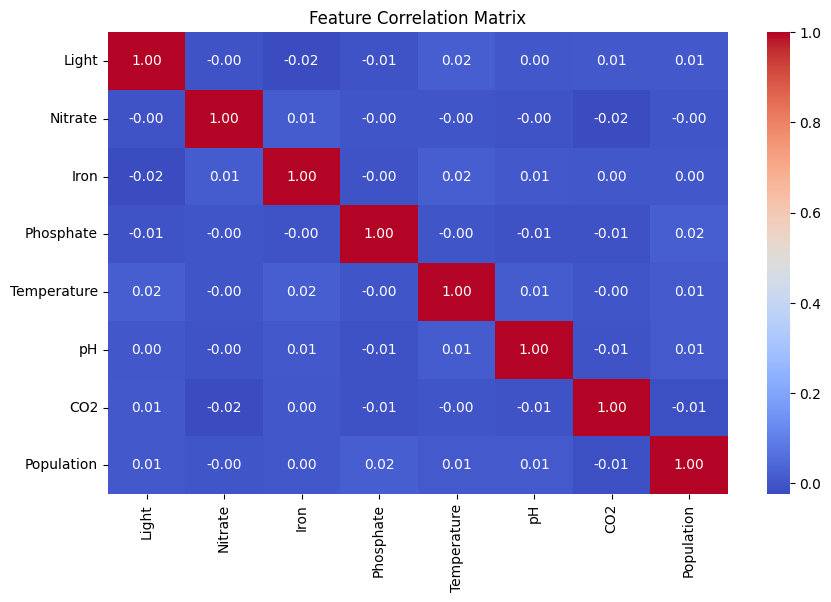

In [12]:
# Correlation Matrix

# the independent variables set
df_corr = df


# Compute correlation
corr_matrix = df_corr.corr()

# Heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


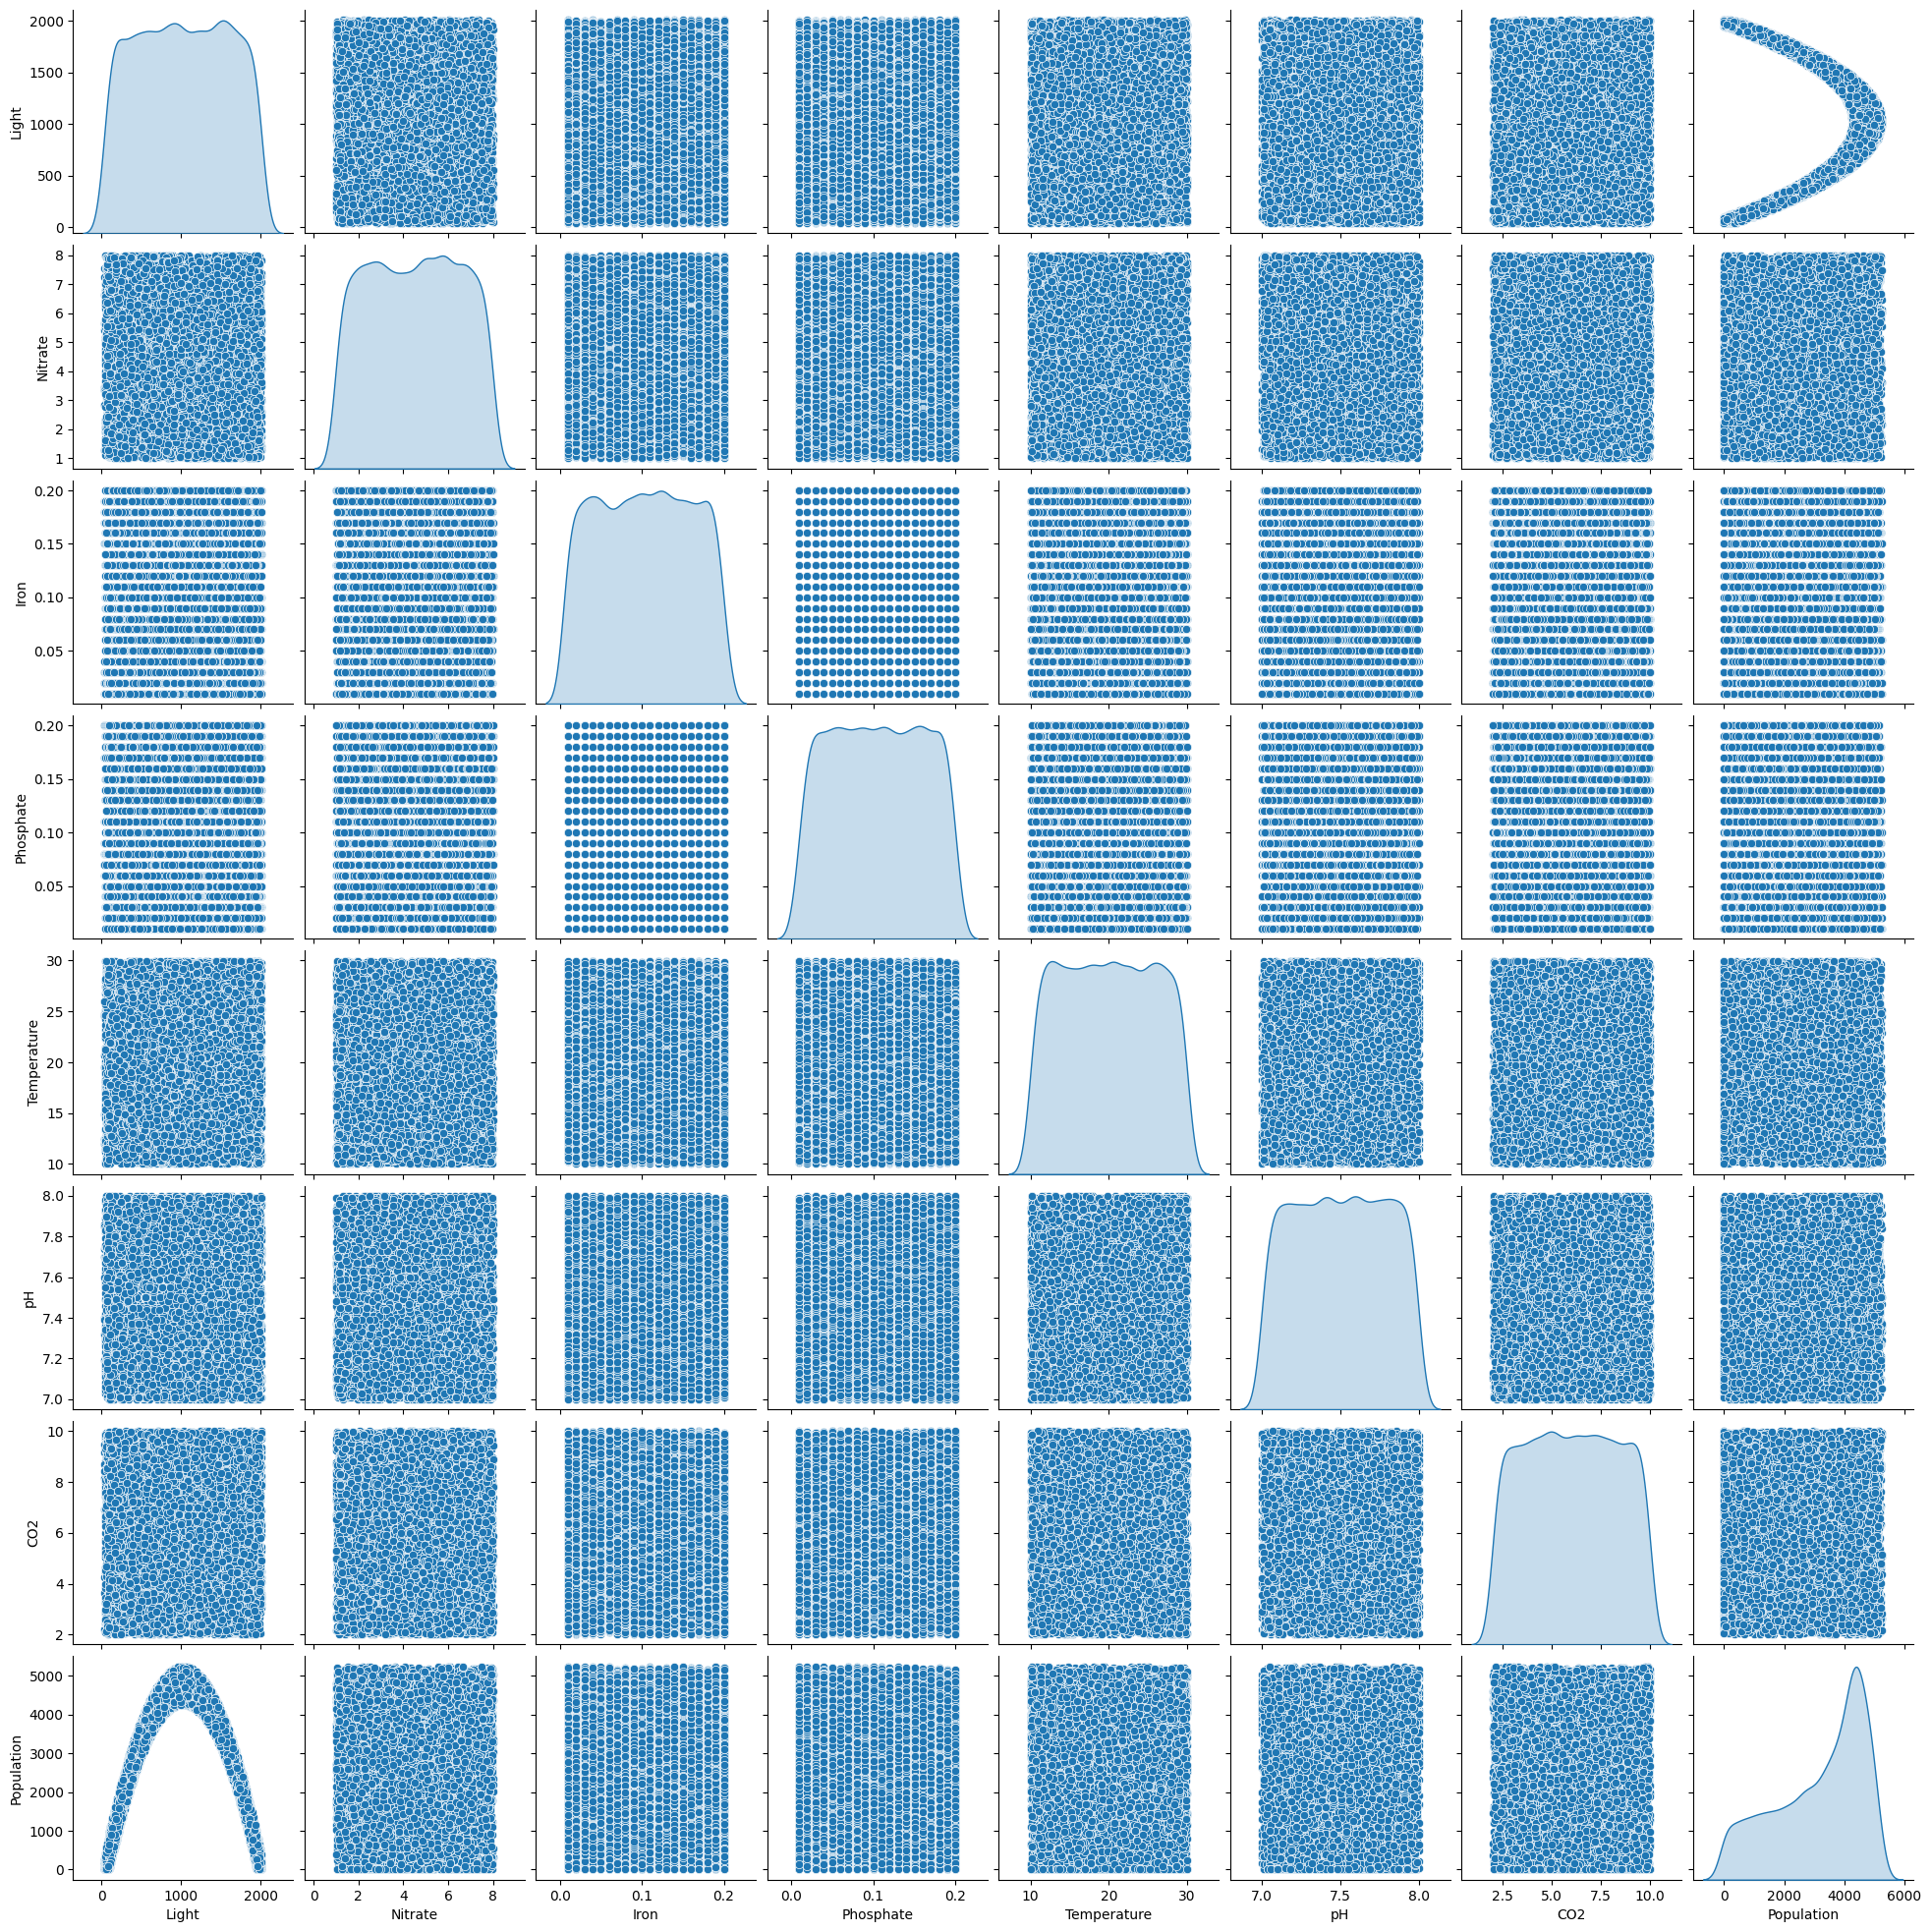

In [13]:
# Pairplot to see relationship

sns.pairplot(df, diag_kind='kde')
plt.show()


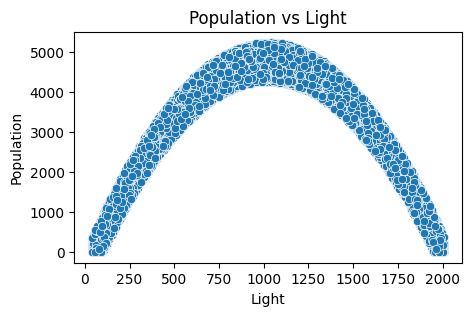

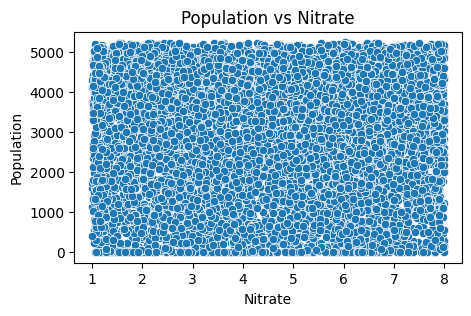

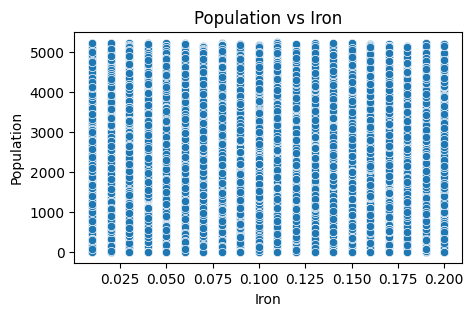

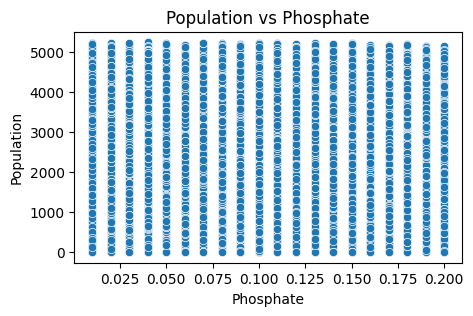

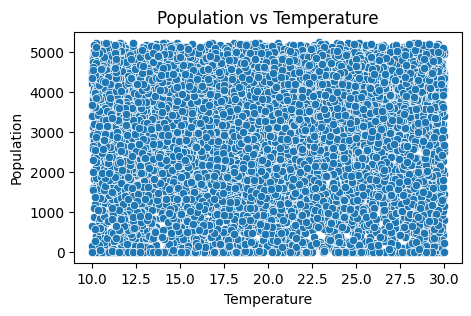

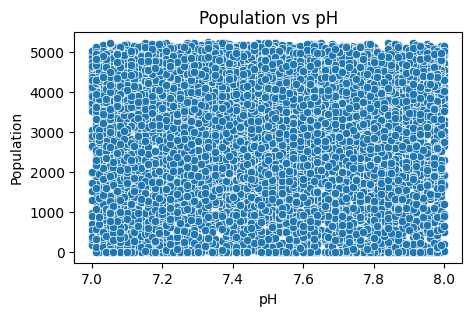

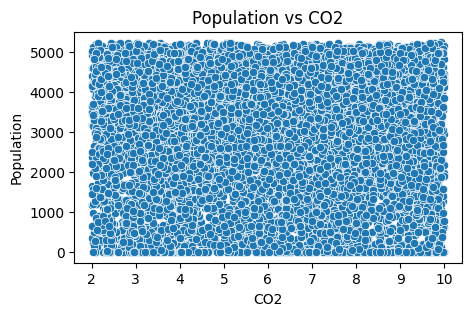

In [14]:
# Relationship population with other features

for col in ['Light', 'Nitrate', 'Iron', 'Phosphate', 'Temperature', 'pH', 'CO2']:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[col], y=df['Population'])
    plt.title(f'Population vs {col}')
    plt.show()
